# **PCA MNIST**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle competitions download -c digit-recognizer

 72% 11.0M/15.3M [00:00<00:00, 19.7MB/s]
100% 15.3M/15.3M [00:00<00:00, 16.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/digit-recognizer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/train.csv')

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(42000, 785)

In [8]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23194,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


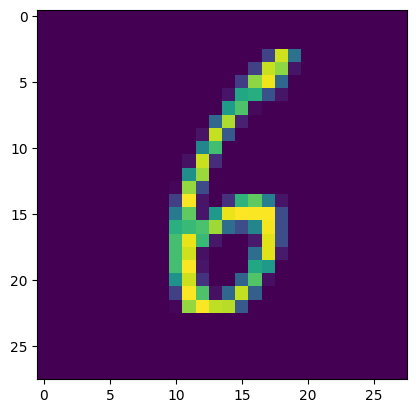

In [9]:
plt.imshow(df.iloc[22140,1:].values.reshape(28,28))

In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(33600, 784)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)


In [20]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [21]:
X_train_trf = pca.fit_transform(X_train_trf)
X_test_trf = pca.transform(X_test_trf)

In [22]:
X_train_trf.shape

(33600, 100)

In [23]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = knn.predict(X_test_trf)

In [25]:
accuracy_score(y_test, y_pred2)

0.9545238095238096

In [ ]:
# for i in range(1, 785):
#     pca = PCA(n_components=i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)

#     knn = KNeighborsClassifier()
#     knn.fit(X_train_trf, y_train)
#     y_pred2 = knn.predict(X_test_trf)

#     print(f'{i},{accuracy_score(y_test, y_pred2)}')

In [28]:
# transforming to 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [29]:
X_train_trf

array([[-226.60330589,  305.89913929],
       [  38.33981245, -461.08413632],
       [-305.49401013, -351.68410335],
       ...,
       [ -27.99705579,  596.06710927],
       [ 233.96501973,   18.63289674],
       [1096.50226522, -254.72033518]])

In [30]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [31]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [32]:
X_train_trf

array([[-226.60474204,  305.89708603,  417.16014806],
       [  38.33796832, -461.08042212,  100.3845733 ],
       [-305.49124471, -351.66467414, -961.35082741],
       ...,
       [ -27.99762305,  596.07623172,  606.18666571],
       [ 233.96864234,   18.64172254, -148.25530271],
       [1096.50207529, -254.7306849 , -560.29119945]])

In [33]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2], color=y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [34]:
pca.explained_variance_
#eigen values

array([335506.57620328, 244807.10507046, 212051.03393483])

In [35]:
pca.components_.shape
# eigen vectors

(3, 784)

In [37]:
pca.explained_variance_ratio_

array([0.09770722, 0.07129345, 0.06175413])

In [38]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [39]:
pca.explained_variance_.shape

(784,)

In [40]:
pca.components_.shape

(784, 784)

In [ ]:
pca.explained_variance_ratio_

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

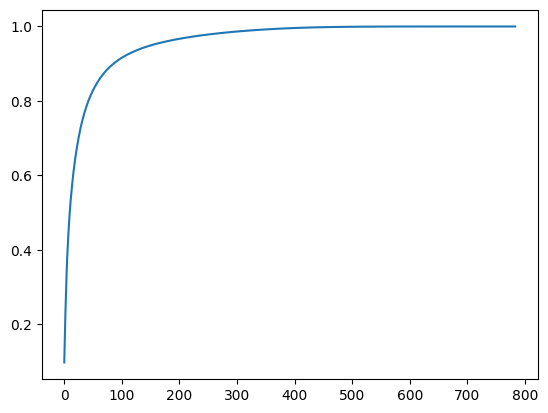

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))